In [12]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# model predictions

In [30]:
df60k = pd.read_json('/home/ravi/raviProject/DataModelsResults/Results/FineTune_RoBERTa_1/Labeled_2261_test_yPred_RoBERTa_60kSteps.json', orient='records')

In [31]:
df60k.head(1)

,replyDate,text,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0


In [32]:
df60k['y_pred'].value_counts()

2    809
1    730
0    722
Name: y_pred, dtype: int64

In [33]:
# Print the first few rows to verify
df60k.head()

,replyDate,text,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0
1,1640990640,I don’t care about him retiring! I want to kno...,AnalyzingAmerica.json,1,1
2,1655419773,The gallows have claimed him already,TrumpSupportersChannel.json,2,2
3,1668105585,We The People need to see EBS and military SOO...,ThePatriotVoice.json,0,2
4,1692627228,DEWs shot down to murder the locals in the way...,ResisttheMainstream.json,0,2


In [34]:
precision_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.8997823749487132

In [35]:
recall_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.9000442282176029

In [36]:
f1_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.8996521357388239

In [37]:
accuracy_score(df60k['Label'], df60k['y_pred'])

0.9000442282176029

In [38]:
# Generate classification report
class_report = classification_report(df60k['Label'], df60k['y_pred'])

In [39]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       753
           1       0.90      0.94      0.92       699
           2       0.91      0.91      0.91       809

    accuracy                           0.90      2261
   macro avg       0.90      0.90      0.90      2261
weighted avg       0.90      0.90      0.90      2261



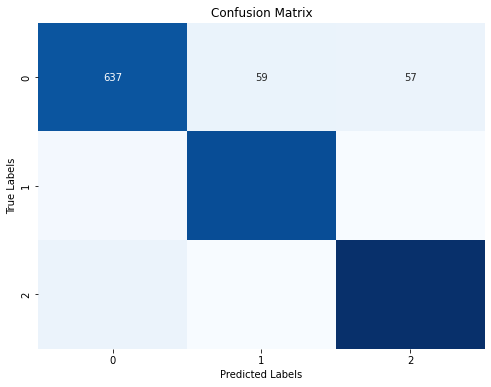

In [40]:
conf_matrix=confusion_matrix(df60k['Label'], df60k['y_pred'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[0, 1, 2])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[0, 1, 2])

plt.show()